## サポートベクタマシン

Text(0, 0.5, 'Feature 1')

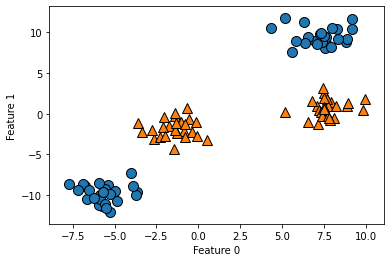

In [14]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

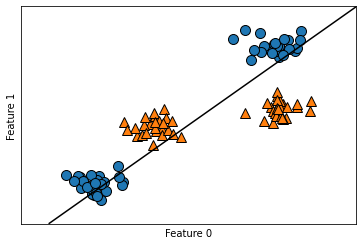

In [2]:
from sklearn.svm import LinearSVC
liner_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(liner_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0.5, 0, 'Feature1 ** 2')

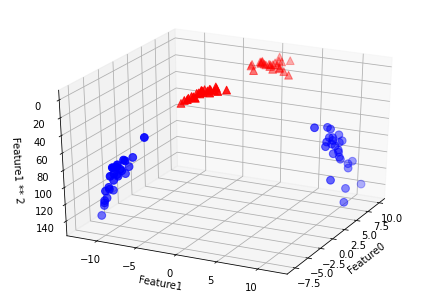

In [3]:
import numpy as np

X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1**2')

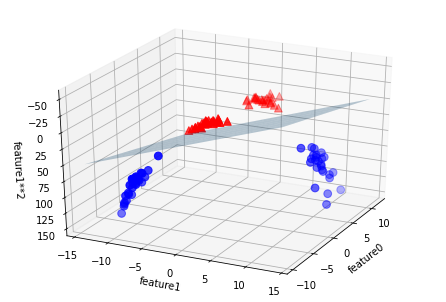

In [4]:
liner_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = liner_svm_3d.coef_.ravel(), liner_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1**2")

Text(0, 0.5, 'Feature 1')

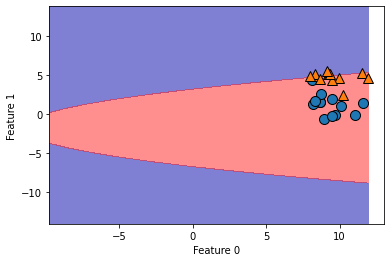

In [11]:
ZZ = YY ** 2
dec = liner_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

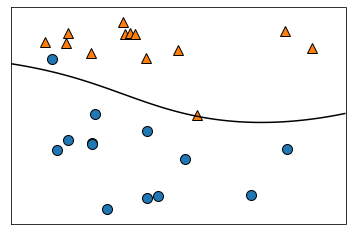

In [13]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")